# **R-Squared Disentangled out-of-sample**

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from datetime import datetime, timedelta


### Import Data

In [10]:
dummy = pd.read_excel('C:/Users/limam/Documents/GitHub/Datathon_2023/Code/Python/result_PCA_indicador_dia_diff.xlsx')

dummy['daily_index'] = dummy['PCA_Normalized']
dummy

,Data,daily_index,Sentiment Score,PCA_Normalized
0,2023-06-30,57.099997,0.057568,57.099997
1,2023-06-29,54.900000,-0.080815,54.900000
2,2023-06-28,63.699998,0.003656,63.699998
3,2023-06-27,60.399997,0.059167,60.399997
4,2023-06-26,55.999998,0.011786,55.999998
...,...,...,...,...
1960,2018-02-05,7.600003,-0.204696,7.600003
1961,2018-02-04,21.899995,0.134817,21.899995
1962,2018-02-03,39.500000,-0.101355,39.500000
1963,2018-02-02,11.999997,0.078715,11.999997


## *R-Squared*

In [11]:
fg = dummy.drop(['Sentiment Score', 'PCA_Normalized'], axis=1).set_index('Data').sort_values(by='Data', ascending=True)
fg['weekly_mean'] = fg['daily_index'].rolling(7).mean()
fg['sentiment'] = 0

"""
fg.loc[(fg['weekly_mean'] <= 24), 'sentiment'] = 'Extreme Fear'
fg.loc[(fg['weekly_mean'] >24) & (fg['weekly_mean'] <= 44), 'sentiment'] = 'Fear'
fg.loc[(fg['weekly_mean'] > 44) & (fg['weekly_mean'] <= 55), 'sentiment'] = 'Neutral'
fg.loc[(fg['weekly_mean'] > 55) & (fg['weekly_mean'] <= 75), 'sentiment'] = 'Greed'
fg.loc[(fg['weekly_mean'] > 75), 'sentiment'] = 'Extreme Greed'
"""

fg.loc[(fg['weekly_mean'] <= 44), 'sentiment'] = 'Fear'
fg.loc[(fg['weekly_mean'] > 44) & (fg['weekly_mean'] <= 55), 'sentiment'] = 'Neutral'
fg.loc[fg['weekly_mean'] > 55, 'sentiment'] = 'Greed'

# fg.loc[(fg['weekly_mean'] <= 50), 'sentiment'] = 'Fear'
# fg.loc[(fg['weekly_mean'] > 50), 'sentiment'] = 'Greed'

# fg.loc[(fg['weekly_mean'] > 24) & (fg['weekly_mean'] <= 75), 'sentiment'] = 'Neutral'
# fg.loc[(fg['weekly_mean'] <= 24) | (fg['weekly_mean'] > 75), 'sentiment'] = 'Extreme'

fg

,daily_index,weekly_mean,sentiment
Data,,,
2018-02-01,28.499998,NaN,0
2018-02-02,11.999997,NaN,0
2018-02-03,39.500000,NaN,0
2018-02-04,21.899995,NaN,0
2018-02-05,7.600003,NaN,0
...,...,...,...
2023-06-26,55.999998,61.342855,Greed
2023-06-27,60.399997,62.914283,Greed
2023-06-28,63.699998,63.385712,Greed


In [12]:
tech = pd.read_excel("C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/tech_signals_w.xlsx")
tech['Date'] = pd.to_datetime(tech['Date'])
tech

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,MOM_12,VOL_1_9,VOL_1_12,VOL_2_9,VOL_2_12,VOL_3_9,VOL_3_12
0,2015-03-02,274.354004,242425100,1,1,1,1,1,0,1,0,1,1,1,1,1,1
1,2015-03-09,286.393005,259502000,1,1,1,1,1,1,1,0,1,1,1,1,1,1
2,2015-03-16,267.959991,206778200,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2015-03-23,242.712997,179497700,0,0,1,1,1,1,1,0,1,1,1,1,1,1
4,2015-03-30,260.597992,150120700,1,1,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2023-10-02,27935.089844,82183775698,1,1,1,1,1,0,0,0,0,0,0,0,0,0
449,2023-10-09,27159.652344,72673654487,1,0,1,1,1,1,1,0,0,0,0,0,0,0
450,2023-10-16,29993.896484,113402383094,1,1,1,1,1,1,1,1,0,0,0,0,0,0
451,2023-10-23,33086.234375,38363572311,1,1,1,1,1,1,1,1,1,0,1,0,0,0


In [15]:
df = tech.merge(fg, how='left', left_on='Date', right_on='Data')
df.dropna(inplace=True)
df.drop('daily_index', axis=1, inplace=True)
df['Date'] = df['Date'] - timedelta(3)
df

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,MOM_12,VOL_1_9,VOL_1_12,VOL_2_9,VOL_2_12,VOL_3_9,VOL_3_12,weekly_mean,sentiment
154,2018-02-09,10551.799805,53626569728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.999998,Fear
155,2018-02-16,9664.730469,55388419584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63.385712,Greed
156,2018-02-23,11512.599609,48902649856,1,0,0,0,0,0,0,0,0,0,0,0,0,0,44.528570,Neutral
157,2018-03-02,9578.629883,49671590400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,46.571429,Neutral
158,2018-03-09,8223.679688,42075919360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.385713,Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2023-05-26,27119.066406,91351657572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.499998,Neutral
431,2023-06-02,25940.167969,116498927148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.385713,Neutral
432,2023-06-09,26336.212891,92905085602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.928568,Neutral
433,2023-06-16,30480.261719,138005623534,1,1,1,1,0,0,1,1,1,1,0,0,0,0,46.099999,Neutral


In [16]:
rf = pd.read_excel('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/risk_free_all_d.xlsx')
rf['r_free_rate'] = rf['r_free_rate'].ffill()
rf['r_free_w'] = rf['r_free_rate'].rolling(7).mean()
rf = rf[['observation_date', 'r_free_w']]
rf['observation_date'] = pd.to_datetime(rf['observation_date'])
rf.dropna(inplace=True)
rf


#rf = pd.read_excel('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/risk_free_d.xlsx')
#rf['r_free_day'] = rf['r_free_day'].ffill()
#rf['r_free_w'] = rf['r_free_day'].rolling(7).mean()
#rf = rf[['observation_date', 'r_free_w']]
#rf['observation_date'] = pd.to_datetime(rf['observation_date'])
#rf.head(10)


,observation_date,r_free_w
6,2018-01-10,0.000051
7,2018-01-11,0.000051
8,2018-01-12,0.000051
9,2018-01-15,0.000051
10,2018-01-16,0.000052
...,...,...
1531,2023-11-15,0.000213
1532,2023-11-16,0.000213
1533,2023-11-17,0.000213
1534,2023-11-20,0.000213


In [17]:
r = df.merge(rf[['observation_date', 'r_free_w']], how='left', left_on='Date', right_on='observation_date')
r['return'] = r['Adj Close'].pct_change().fillna(0)
r['risk_premium'] = r['return'] - r['r_free_w']
rf = r.drop(index=r.index[0]).reset_index(drop=True)
rf

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,...,VOL_2_9,VOL_2_12,VOL_3_9,VOL_3_12,weekly_mean,sentiment,observation_date,r_free_w,return,risk_premium
0,2018-02-16,9664.730469,55388419584,0,0,0,0,0,0,0,...,0,0,0,0,63.385712,Greed,2018-02-16,0.000052,-0.084068,-0.084120
1,2018-02-23,11512.599609,48902649856,1,0,0,0,0,0,0,...,0,0,0,0,44.528570,Neutral,2018-02-23,0.000054,0.191197,0.191144
2,2018-03-02,9578.629883,49671590400,0,0,1,0,0,0,0,...,0,0,0,0,46.571429,Neutral,2018-03-02,0.000057,-0.167987,-0.168044
3,2018-03-09,8223.679688,42075919360,0,0,0,0,0,0,0,...,0,0,0,0,41.385713,Fear,2018-03-09,0.000061,-0.141456,-0.141516
4,2018-03-16,8495.780273,40853020160,0,0,0,0,0,0,0,...,0,0,0,0,32.428569,Fear,2018-03-16,0.000065,0.033087,0.033023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-05-26,27119.066406,91351657572,0,0,0,0,0,0,0,...,0,0,0,0,50.499998,Neutral,2023-05-26,0.000222,-0.034415,-0.034637
273,2023-06-02,25940.167969,116498927148,0,0,0,0,0,0,0,...,0,0,0,0,52.385713,Neutral,2023-06-02,0.000216,-0.043471,-0.043687
274,2023-06-09,26336.212891,92905085602,0,0,0,0,0,0,0,...,0,0,0,0,48.928568,Neutral,2023-06-09,0.000202,0.015268,0.015066
275,2023-06-16,30480.261719,138005623534,1,1,1,1,0,0,1,...,0,0,0,0,46.099999,Neutral,2023-06-16,0.000202,0.157352,0.157150


In [18]:
dummies = pd.get_dummies(rf['sentiment'])
df = pd.concat([rf.drop('sentiment', axis=1), dummies], axis=1)
df.drop('observation_date', axis=1, inplace=True)
df.dropna(inplace=True)
df

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,...,VOL_2_12,VOL_3_9,VOL_3_12,weekly_mean,r_free_w,return,risk_premium,Fear,Greed,Neutral
0,2018-02-16,9664.730469,55388419584,0,0,0,0,0,0,0,...,0,0,0,63.385712,0.000052,-0.084068,-0.084120,False,True,False
1,2018-02-23,11512.599609,48902649856,1,0,0,0,0,0,0,...,0,0,0,44.528570,0.000054,0.191197,0.191144,False,False,True
2,2018-03-02,9578.629883,49671590400,0,0,1,0,0,0,0,...,0,0,0,46.571429,0.000057,-0.167987,-0.168044,False,False,True
3,2018-03-09,8223.679688,42075919360,0,0,0,0,0,0,0,...,0,0,0,41.385713,0.000061,-0.141456,-0.141516,True,False,False
4,2018-03-16,8495.780273,40853020160,0,0,0,0,0,0,0,...,0,0,0,32.428569,0.000065,0.033087,0.033023,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-05-26,27119.066406,91351657572,0,0,0,0,0,0,0,...,0,0,0,50.499998,0.000222,-0.034415,-0.034637,False,False,True
273,2023-06-02,25940.167969,116498927148,0,0,0,0,0,0,0,...,0,0,0,52.385713,0.000216,-0.043471,-0.043687,False,False,True
274,2023-06-09,26336.212891,92905085602,0,0,0,0,0,0,0,...,0,0,0,48.928568,0.000202,0.015268,0.015066,False,False,True
275,2023-06-16,30480.261719,138005623534,1,1,1,1,0,0,1,...,0,0,0,46.099999,0.000202,0.157352,0.157150,False,False,True


In [19]:
r2 = {}

n = 14  # Number of technical indicators
t = len(df)
initial_period = 150  # Initial period for the first regression
summaries = []  # To store summary objects for later use

# Arrays to store predictions and errors
predictions = np.zeros((t - initial_period-2, n))
errors = np.zeros((t - initial_period-2, n))

for i in range(3, 17):
    
    # The dependent variable (Y)
    y = df['risk_premium'][1:df.shape[0]].values
    
    # Loop to perform rolling regression and predictions
    for current_t in range(initial_period, len(y)-1):
        
        # The independent variable (X)
        x = df.iloc[0:current_t, i].values  # Use data from the beginning up to the current time
        x = sm.add_constant(x)  # Add the intercept
        
        # Perform regression
        model = sm.OLS(y[:current_t], x).fit()

        # Make prediction for the next value if we're not at the end of the dataset
        if current_t < len(y):
            next_x = np.array([[1, df.iloc[current_t+1, i]]])  # Prepare next X value as a 2D array 
            predicted_value = model.predict(next_x)
            predictions[current_t - initial_period, i-3] = predicted_value
            
            # Calculate and store the error of the prediction
            actual_value = y[current_t+1]
            error = actual_value - predicted_value
            errors[current_t - initial_period, i-3] = error
    
    summaries.append(model.summary())   

In [20]:
# Calculate the sum of squared errors for the historical average
#actual_returns = df['risk_premium'].values[initial_period+1:]
actual_returns = df['risk_premium'][151:df.shape[0]-1].values
# Calculate the historical average of returns up to each prediction point
j = 0
historical_average = np.array([df['risk_premium'][:j].mean() for j in range(initial_period+2, len(df))])

# Initialize a list to store the R^2_OS for each technical indicator
r2 = {}

# Loop over each of the 14 technical indicators
for i in range(3, 17):
    Ic = []
    for j in range(21, 24):
        # Calculate the sum of squared errors for the predictive model
        sse_model = np.sum(((actual_returns - predictions[:, i-3]) ** 2)*df.iloc[151:df.shape[0]-1, j])        
        # Calculate the sum of squared errors for the historical average
        sse_historical = np.sum(((actual_returns - historical_average) ** 2)*df.iloc[151:df.shape[0]-1, j])

        # Calculate the out-of-sample R squared (R^2_OS) for this technical indicator
        r_squared_os = 1 - (sse_model / sse_historical)
        #print(f"Out-of-Sample R² for technical indicator {df.columns[i]} - {df.columns[j]}: {r_squared_os}")
        # Store the R^2_OS value in the list
        Ic.append(r_squared_os)
    r2[df.columns[i]] = Ic

    # Print the R^2_OS for the current technical indicator

In [21]:
r2_df = pd.DataFrame(r2)
r2_df = r2_df.T
r2_df.columns = ['Fear', 'Greed', 'Neutral']
r2_df


,Fear,Greed,Neutral
MA_1_9,0.103822,0.003511,0.137788
MA_1_12,0.117647,0.016842,0.151667
MA_2_9,0.055194,0.006328,0.046070
MA_2_12,0.062025,0.008352,-0.013783
MA_3_9,0.036186,-0.012769,0.001560
MA_3_12,0.038936,-0.017774,-0.037939
MOM_9,0.079331,-0.008390,0.064677
MOM_12,0.045297,-0.045143,0.079259
VOL_1_9,0.074688,0.053326,0.090946
VOL_1_12,0.072020,0.037796,0.023911


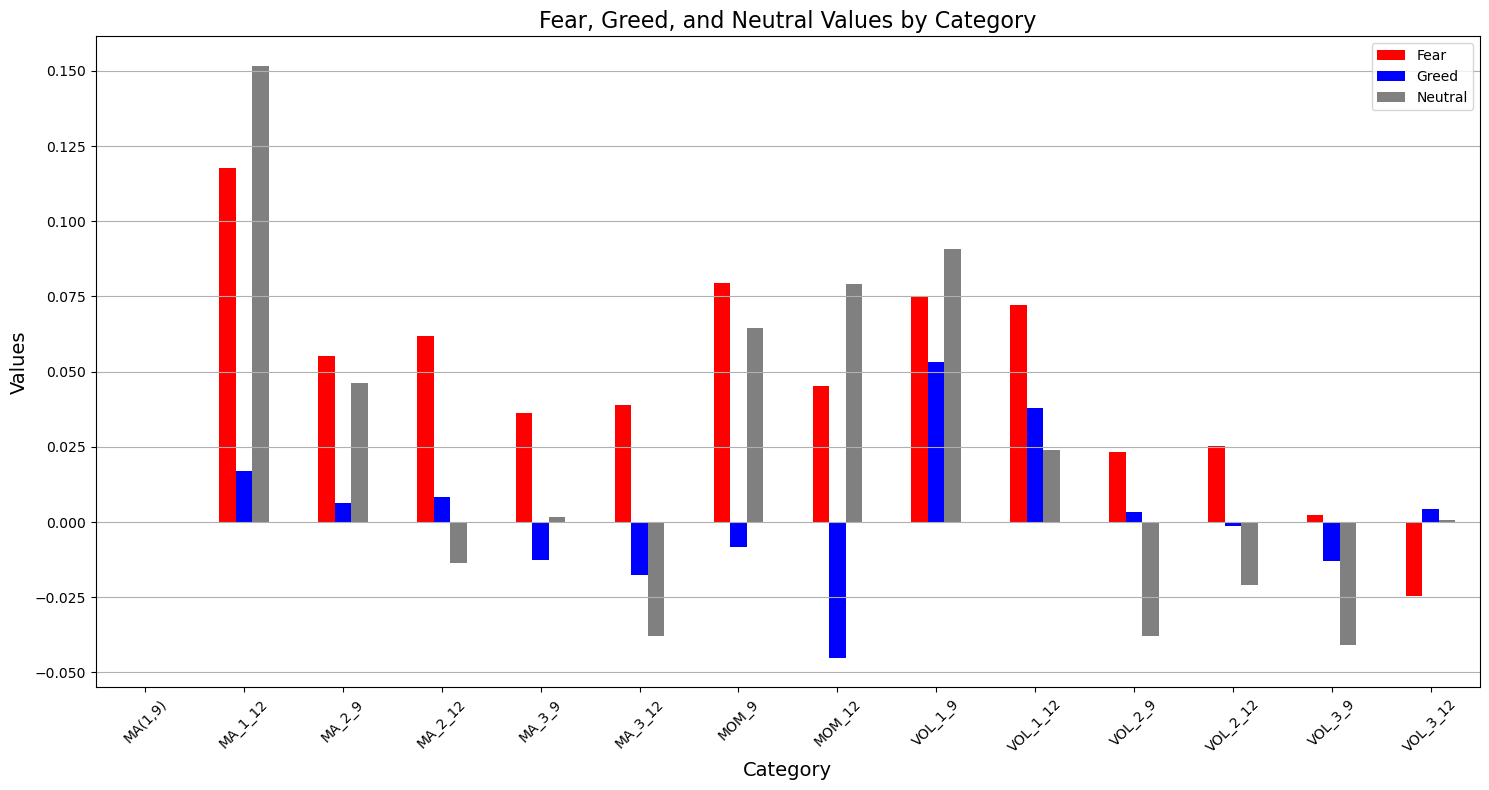

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

index = ["MA(1,9)", "MA_1_12", "MA_2_9", "MA_2_12", "MA_3_9", "MA_3_12", "MOM_9", "MOM_12", "VOL_1_9", "VOL_1_12", "VOL_2_9", "VOL_2_12", "VOL_3_9", "VOL_3_12"]
df = pd.DataFrame(r2_df, index=index)

# Plotting
ax = df.plot(kind='bar', color=['red', 'blue', 'gray'], figsize=(15, 8))

# Customizing plot
ax.set_title("Fear, Greed, and Neutral Values by Category", fontsize=16)
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

In [93]:
r2_df = pd.DataFrame(r2)
r2_df = r2_df.T
r2_df.columns = ['Fear', 'Greed', 'Neutral']
r2_df

,Fear,Greed,Neutral
MA_1_9,0.101224,0.005305,0.106889
MA_1_12,0.114652,0.017780,0.122787
MA_2_9,0.053964,0.008039,0.033965
MA_2_12,0.060596,0.008918,-0.018012
MA_3_9,0.035413,-0.011376,-0.011456
MA_3_12,0.038097,-0.017914,-0.031804
MOM_9,0.077322,-0.008187,0.039461
MOM_12,0.043769,-0.045496,0.059400
VOL_1_9,0.072727,0.047724,0.075879
VOL_1_12,0.070213,0.034128,0.024527


In [37]:
r2_df = pd.DataFrame(r2)
r2_df = r2_df.T
r2_df.columns = ['Fear', 'Greed', 'Neutral']
r2_df

,Fear,Greed,Neutral
MA_1_9,0.101224,0.005305,0.106889
MA_1_12,0.114652,0.017780,0.122787
MA_2_9,0.053964,0.008039,0.033965
MA_2_12,0.060596,0.008918,-0.018012
MA_3_9,0.035413,-0.011376,-0.011456
MA_3_12,0.038097,-0.017914,-0.031804
MOM_9,0.077322,-0.008187,0.039461
MOM_12,0.043769,-0.045496,0.059400
VOL_1_9,0.072727,0.047724,0.075879
VOL_1_12,0.070213,0.034128,0.024527


In [14]:
r2_df = pd.DataFrame(r2)
r2_df = r2_df.T
r2_df.columns = ['Extreme Fear', 'Extreme Greed', 'Fear', 'Greed', 'Neutral']
r2_df

,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
MA_1_9,0.055151,-0.256661,0.022060,-0.293492,-0.020438
MA_1_12,0.017254,-0.235491,-0.003462,-0.201567,-0.092483
MA_2_9,0.046872,-0.185135,-0.002936,-0.201033,-0.011374
MA_2_12,0.045578,-0.221692,-0.041775,-0.173907,-0.042115
MA_3_9,0.048887,-0.237348,-0.026791,-0.196090,-0.009837
MA_3_12,0.041050,-0.204274,-0.038065,-0.150600,-0.017175
MOM_9,-0.021486,-0.306058,0.052358,-0.284558,-0.055728
MOM_12,-0.002024,-0.115309,0.011055,-0.129882,-0.039142
VOL_1_9,0.061626,-0.272954,-0.049410,-0.220089,0.033177
VOL_1_12,0.060606,-0.277093,-0.112869,-0.162484,0.017217


In [12]:
for col in r2_df.columns:
    print(col, round(r2_df[col].mean(), 2))

Extreme Fear -0.0
Extreme Greed -0.01
Fear -0.01
Greed -0.03
Neutral -0.05
